In [1]:
# Import necessary libraries for data processing, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

np.random.seed(42) # Fixed random seed for reproducibility to ensure consistent results across all runs
n_samples = 120 
diseases = ['Covid-19', 'Flu', 'Allergy', 'Common Cold', 'Gastroenteritis']
data = []

for _ in range(n_samples):
    disease = np.random.choice(diseases)
    age = np.random.randint(18, 71)
    # Each condition is mapped to a specific binary vector representing typical medical symptoms
    if disease == 'Covid-19':
        fever, cough, fatigue, headache, nausea = 1, 1, 1, 0, 0
    elif disease == 'Flu':
        fever, cough, fatigue, headache, nausea = 1, 0, 1, 1, 0
    elif disease == 'Allergy':
        fever, cough, fatigue, headache, nausea = 0, 1, 0, 0, 0
    elif disease == 'Common Cold':
        fever, cough, fatigue, headache, nausea = 0, 1, 0, 1, 0
    elif disease == 'Gastroenteritis':
        fever, cough, fatigue, headache, nausea = 0, 0, 1, 0, 1

    symptoms = [fever, cough, fatigue, headache, nausea]
    # Injecting stochastic noise (5% probability) to simulate clinical variability and ensure the model's robustness against atypical patient presentations
    for i in range(len(symptoms)):
        if np.random.rand() < 0.05:
            symptoms[i] = 1 - symptoms[i]
            
    data.append([age] + symptoms + [disease])

df = pd.DataFrame(data, columns=['Age', 'Fever', 'Cough', 'Fatigue', 'Headache', 'Nausea', 'Diagnosed Disease'])
print("Preview of the Medical Symptoms Dataset:")
print(df.head(120))


Preview of the Medical Symptoms Dataset:
     Age  Fever  Cough  Fatigue  Headache  Nausea Diagnosed Disease
0     46      0      1        0         1       0       Common Cold
1     41      0      1        0         0       0           Allergy
2     38      1      0        0         0       0               Flu
3     45      1      0        1         1       0               Flu
4     20      0      1        0         0       0       Common Cold
..   ...    ...    ...      ...       ...     ...               ...
115   55      0      0        1         0       1   Gastroenteritis
116   31      1      0        1         1       0               Flu
117   25      0      1        0         0       0           Allergy
118   53      0      1        0         0       0           Allergy
119   39      0      1        0         1       0       Common Cold

[120 rows x 7 columns]


In [2]:
# X contains the symptoms, y contains the actual disease names
X = df.drop('Diagnosed Disease', axis=1)
y = df['Diagnosed Disease']

# Partitioning the dataset into training and testing sets to evaluate predictive performance on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create models and train them using the training data
dt_model = DecisionTreeClassifier(random_state=42) # Decision Tree
dt_model.fit(X_train, y_train) # Training

rf_model = RandomForestClassifier(random_state=42) # Random Forest
rf_model.fit(X_train, y_train) # Training

svm_model = SVC(kernel='linear', random_state=42) # Support Vector Machine
svm_model.fit(X_train, y_train) # Training


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


Decision Tree Accuracy: %95.83
Random Forest Accuracy: %95.83
SVM Accuracy: %95.83


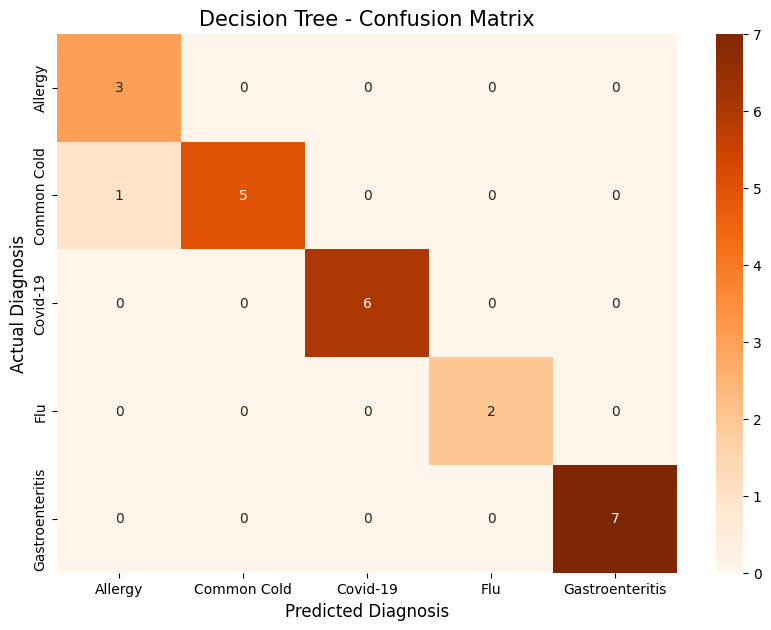

In [3]:
# Computing performance metrics to evaluate the classification efficiency of different machine learning algorithms
dt_acc = accuracy_score(y_test, dt_model.predict(X_test))
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))

print(f"Decision Tree Accuracy: %{dt_acc*100:.2f}")
print(f"Random Forest Accuracy: %{rf_acc*100:.2f}")
print(f"SVM Accuracy: %{svm_acc*100:.2f}")

# Generate the matrix comparing actual vs predicted labels
cm_dt = confusion_matrix(y_test, dt_model.predict(X_test))
plt.figure(figsize=(10,7))

# Plotting the heatmap for better visualization of predictions
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=dt_model.classes_, 
            yticklabels=dt_model.classes_)

# Adding labels for clarity
plt.title('Decision Tree - Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Diagnosis', fontsize=12)
plt.ylabel('Actual Diagnosis', fontsize=12)
plt.show()

In [4]:
#To ensure the model was not overfitting, we compare the Training Accuracy and Testing Accuracy.
train_acc = accuracy_score(y_train, rf_model.predict(X_train))
test_acc = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Training Accuracy: %{train_acc*100:.2f}")
print(f"Testing Accuracy: %{test_acc*100:.2f}")

# Cross-validation check between training and testing scores to ensure the model generalizes well rather than memorizing the data
if train_acc > test_acc + 0.10: 
    print("\nStatus: Potential Overfitting Detected")
else:
    print("\nStatus: Model is Well-Generalized")

Training Accuracy: %98.96
Testing Accuracy: %95.83

Status: Model is Well-Generalized


In [5]:
# Get patient data from the user
print("\n--- Interactive Disease Diagnosis System ---")

age = int(input("Please enter your age: "))
fever = int(input("Do you have a fever? (1: Yes, 0: No): "))
cough = int(input("Do you have a cough? (1: Yes, 0: No): "))
fatigue = int(input("Do you feel fatigue? (1: Yes, 0: No): "))
headache = int(input("Do you have a headache? (1: Yes, 0: No): "))
nausea = int(input("Do you feel nausea? (1: Yes, 0: No): "))

# Prepare the data for the model
user_data = pd.DataFrame([[age, fever, cough, fatigue, headache, nausea]], 
                         columns=['Age', 'Fever', 'Cough', 'Fatigue', 'Headache', 'Nausea'])
# Get the diagnosis result from the model
prediction = rf_model.predict(user_data)

print(f"\nResult: Based on your symptoms, the model predicts: **{prediction[0]}**")


--- Interactive Disease Diagnosis System ---


Please enter your age:  20
Do you have a fever? (1: Yes, 0: No):  1
Do you have a cough? (1: Yes, 0: No):  1
Do you feel fatigue? (1: Yes, 0: No):  0
Do you have a headache? (1: Yes, 0: No):  1
Do you feel nausea? (1: Yes, 0: No):  0



Result: Based on your symptoms, the model predicts: **Common Cold**
